# Intro to Supervised Machine Learning

## Table of Contents

insert table of contents here

## Classification

#### Loading and preparing the data

In [24]:
from sklearn.datasets import load_iris, fetch_california_housing
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
iris = load_iris()
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [20]:
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df["target"] = iris["target"]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Checking for anomalies

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


#### Quick EDA

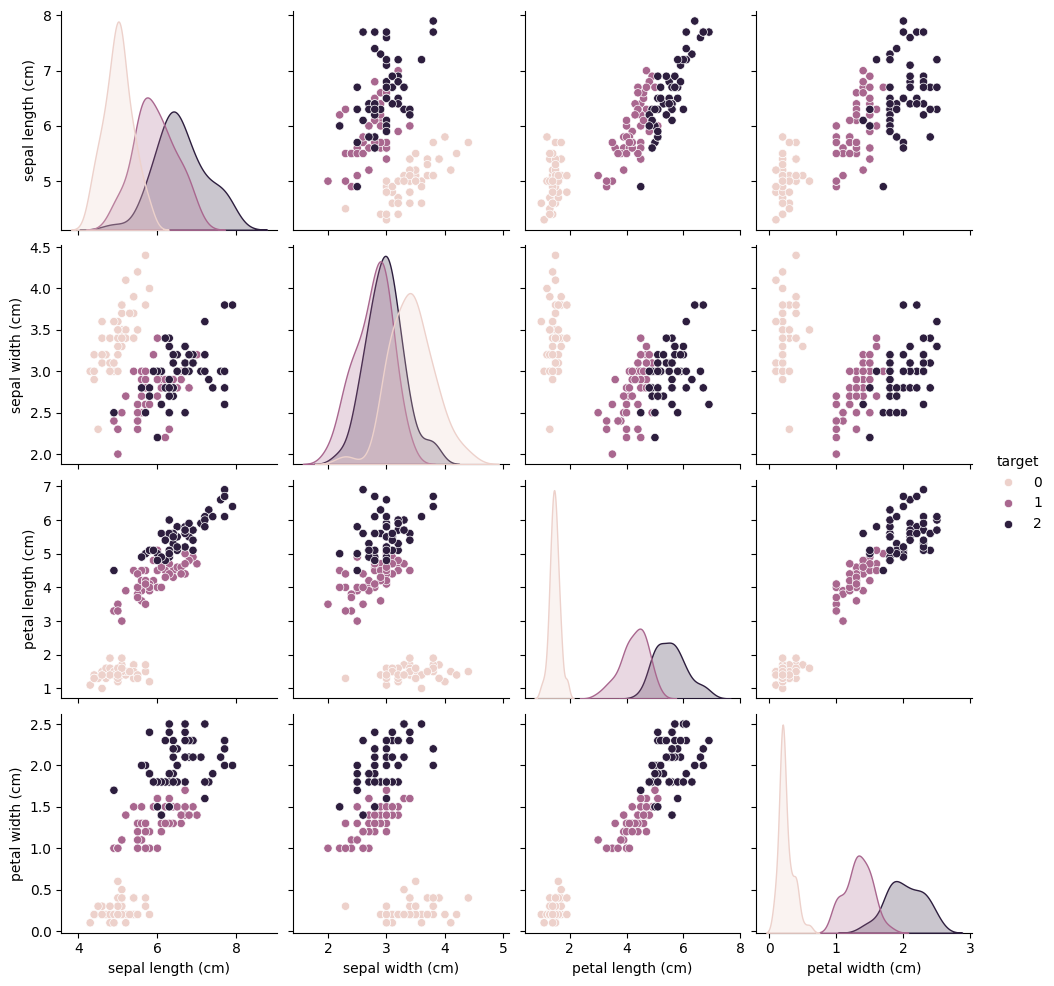

In [26]:
sns.pairplot(df, hue="target")
plt.show()

#### Train Test Split

First we need to distinguish from features and target

In [82]:
features = df.drop(columns = ["target"])
target = df["target"]

Now we perform the division between Train and Test, we will reserve 20% of our data to Test.

In [83]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [30]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,4.7,3.2,1.3,0.2
127,6.1,3.0,4.9,1.8
96,5.7,2.9,4.2,1.3
34,4.9,3.1,1.5,0.2
52,6.9,3.1,4.9,1.5


In [32]:
y_train.head()

2      0
127    2
96     1
34     0
52     1
Name: target, dtype: int32

For this dataset we will use KNN Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

Creating an instance of the model, for now, we will use n_neighbors=3 (we will see how to optimize this hyperparameter later)

In [84]:
knn = KNeighborsClassifier(n_neighbors=3)

Training the model

In [85]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now, our model is already trained, we can make predictions for new data points

In [86]:
pred = knn.predict(X_test)
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

Let's compare with the true labels

In [87]:
y_test.values

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

It seems that our model was able to correctly predict the great majority of data points. To be precise, 29 out of 30 data points were correctly labeled.

In order to evaluate our model, we will use the method "score" that will give us accuracy.

In [49]:
knn.score(X_test, y_test)

0.9666666666666667

## Regression

#### Loading and preparing the data

In [51]:
california = fetch_california_housing()
print(california["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [52]:
df_cali = pd.DataFrame(california["data"], columns = california["feature_names"])
df_cali["median_house_value"] = california["target"]

df_cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Checking for anomalies

In [53]:
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Quick EDA

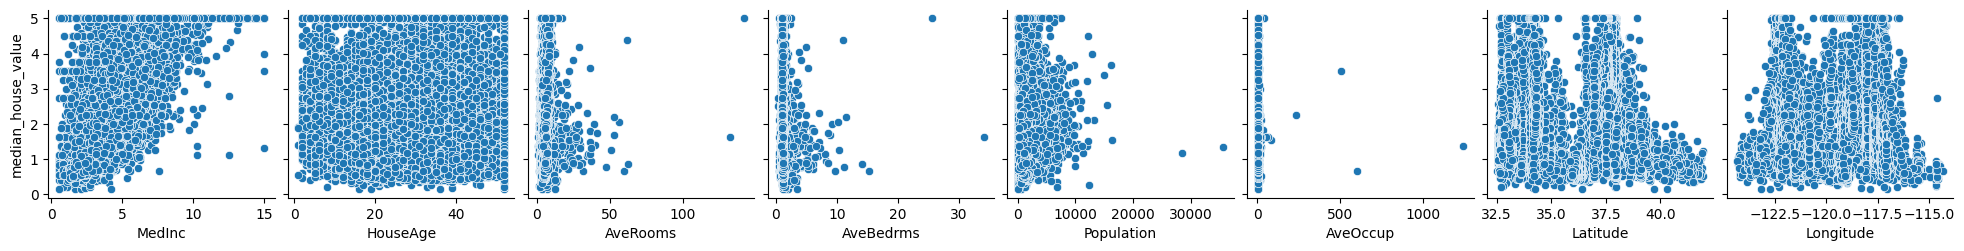

In [56]:
sns.pairplot(df_cali, y_vars=['median_house_value'], x_vars=df_cali.columns[:-1], kind='scatter')

#### Train Test Split

First we need to distinguish from features and target

In [57]:
features = df_cali.drop(columns = ["median_house_value"])
target = df_cali["median_house_value"]

Now we perform the division between Train and Test, we will reserve 20% of our data to Test.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [59]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12069,4.2386,6.0,7.723077,1.169231,228.0,3.507692,33.83,-117.55
15925,4.3898,52.0,5.326622,1.100671,1485.0,3.322148,37.73,-122.44
11162,3.9333,26.0,4.668478,1.046196,1022.0,2.777174,33.83,-118.00
4904,1.4653,38.0,3.383495,1.009709,749.0,3.635922,34.01,-118.26
4683,3.1765,52.0,4.119792,1.043403,1135.0,1.970486,34.08,-118.36


In [60]:
y_train.head()

12069    5.00001
15925    2.70000
11162    1.96100
4904     1.18800
4683     2.25000
Name: median_house_value, dtype: float64

Now, we will use KNN Regressor, we will use hyperparameter n_neighbors = 10.

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [77]:
knn = KNeighborsRegressor(n_neighbors=10)

In [78]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

We are going to evaluate our model performance with R-Squared

In [79]:
knn.score(X_test, y_test)

0.16103204926382153

Pretty bad model, remember, we want R2 as high as possible!

KNN is a distance base model, features having different scales are having an impact on the model's performance.